# Explore microfluidic flow rate and pressure according to a defined geometry

*Date : 20/11/2016*

*Note : Feel free to report any errors/mistakes.*

The purpose of this notebook **is not** to go deep inside the fluid mechanic in microfluidic devices but more trying to develop an intuition of the different physical constants and their order of magnitude at this scale.

<img src="drawing.png" alt="" width="600px"/>

For easier calculations, we assume very simple geometries : rectangle or circle.

## Theory

### Flow rate

The flow rate depends on the pressure difference, the properties of the fluid and the geometry used. We can apply the Ohm's law to a flow of particles other than electron.

$
\Delta P = RQ
$

Where : 

- $\Delta P$ is the pressure (analog to the tension $U$).
- $R$ is the internal resistance of the system (analog to the Ohm's resistance).
- $Q$ is the flow rate, analog to the intensity of the current $I$.

For each type of channels used in the microfluidic system the resistance need to be calculated.

#### Cylindrical channel

For a Poiseuille flow, we define the resistance ($R$) into a cylindrical channel with :

$
R = \cfrac{8 \eta L}{\pi r⁴}
$

Where : 

- $R$ is the resistance of the channel (Pa.s/m³)
- $r$ is the internal radius of the cylinder
- $\eta$ is the dynamic fluid viscosity (Pa.s or N.s/m²)
- $L$ is the length of the channel (m)

Then we can define the flow rate $Q$ according to a given pressure $P$.

$
Q = \cfrac{\Delta P}{R} = \cfrac{\pi r⁴}{8 \eta L} |\Delta P|
$

Where : 

- $\Delta P$ is the difference of pressure (Pa)
- $Q$ is the flow rate (m³/s)


#### Rectangular channel

For a Poiseuille flow, we define the the resistance ($R$) into a rectangular channel with :

$
R \approx \cfrac{12 \eta L}{\Bigl[1 - 0.630 \cfrac{h}{w}\Bigr] h³w}
$

Where : 

- $R$ is the resistance of the channel (Pa.s/m³)
- $h$ is the height of the rectangular channel (m)
- $w$ is the width of the rectangular channel (m)
- $\eta$ is the dynamic fluid viscosity (Pa.s or N.s/m²)
- $L$ is the length of the channel (m)

Then we can define the flow rate $Q$ according to a given pressure $P$.

$
Q = \cfrac{\Delta P}{R} \approx  \cfrac{\Bigl[1 - 0.630 \cfrac{h}{w}\Bigr] h³w}{12 \eta L} \Delta P
$

Where : 

- $\Delta P$ is the difference of pressure (Pa)
- $Q$ is the flow rate (m³/s)

### Flow velocity

The velocity $V$ is calculated from the flow rate ($Q$) and the section of the channel ($S$): 

$V = \cfrac{Q}{S}$

Where : 

- $V$ is the fluid velocity (m/s)
- $Q$ is the flow rate (m³/s)
- $S$ is the surface section (m²)

### Reynolds number

We define the Reynolds number : 

$Re = \cfrac{inertial\; forces}{viscous\; forces} = \cfrac{ρVL}{μ}$

Where : 

- $ρ$ is the density of the fluid (kg/m³)
- $V$ is the velocity of the object relative to the fluid (m/s)
- $L$ is a characteristic length (m)
- $μ$ is the dynamic viscosity of the fluid (Pa.s or N.s/m²)

We can define the kinematic viscosity of the fluid (m²/s) : $ν = \cfrac{μ}{ρ}$. So : 

$Re = \cfrac{ρVL}{μ} = \cfrac{VL}{ν}$

## Calculations

Below some functions to help make the calculation of the different equations above.

In [1]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt

def calculcate_section_circle(diameter):
    return np.pi * ((diameter / 2) ** 2)

def calculcate_section_rectangle(height, width):
    return height * width

def calculate_characteristic_length_circle(diameter):
    return diameter

def calculate_characteristic_length_rectangle(height, width):
    return (2 * height * width) / (height + width)

def calculate_kinematic_viscosity(viscosity, density):
    return viscosity / density

def calculate_flow_rate_circle(diameter, viscosity, length, delta_pressure):
    return (np.pi * (diameter / 2)**4 * np.abs(delta_pressure)) / (8 * viscosity * length)

def calculate_flow_rate_rectangle(height, width, viscosity, length, delta_pressure):
    return (1 - 0.630 * (height / width)) * (((height ** 3) * width * delta_pressure) / (12 * viscosity * length))

def calculate_pressure_circle(diameter, viscosity, length, flow_rate):
    return (8 * viscosity * length * flow_rate) / (np.pi * (diameter / 2)**4)

def calculate_pressure_rectangle(height, width, viscosity, length, flow_rate):
    return (12 * viscosity * length * flow_rate) / ((1 - 0.630 * (height / width)) * ((height ** 3) * width))

def calculate_flow_velocity(flow_rate, section):
    return (flow_rate / section)

def calculate_reynolds_number(kinematic_viscosity, characteristic_length, velocity):
    return (velocity * characteristic_length) / kinematic_viscosity

Define some initial conditions (feel free to test others conditions) :

### Interactive widgets

In [2]:
from ipywidgets import interactive

### Calculate pressure needed for a given flow rate

In [3]:
# Initial conditions

## Geometry
height = 100e-6  # m (not used for circle)
width = 100e-6  # m (not used for circle)
diameter = 100e-6  # m (not used for rectangle)
shape = "rectangle"  # Choose in ["rectangle", "circle"]

length = 20e-3  # m

## Water at 20°C
viscosity = 1.307e-3  # Pa.s or  N.s/m²
density = 1e3  # kg/m³

## Flow rate wanted
flow_rate = 20  # ul/min

## Convert flow rate to IU
flow_rate_iu = (flow_rate / 60) * 1e-9

assert height <= width

Do the math !

In [4]:
if shape == "circle":
    section = calculcate_section_circle(diameter)
    characteristic_length = calculate_characteristic_length_circle(diameter)
    pressure = calculate_pressure_circle(diameter, viscosity, length, flow_rate_iu)
    
elif shape == "rectangle":
    section = calculcate_section_rectangle(height, width)
    characteristic_length = calculate_characteristic_length_rectangle(height, width)
    pressure = calculate_pressure_rectangle(height, width, viscosity, length, flow_rate_iu)
    
kinematic_viscosity = calculate_kinematic_viscosity(viscosity, density)
flow_velocity = calculate_flow_velocity(flow_rate_iu, section)

reynolds_number = calculate_reynolds_number(kinematic_viscosity, characteristic_length, flow_velocity)
    
print("Shape used is '{}'.".format(shape))
print("Flow rate wanted is {} ul/min.".format(flow_rate))
print()
print("Section is {0:.3f} mm².".format(section*1e6))
print("Characteristic length is {0:.0f} μm.".format(characteristic_length*1e6))
print()
print("Kinematic viscosity is {} m²/s.".format(kinematic_viscosity))
print()
print("Pressure {0:.3f} mbar.".format(pressure / 100))
print("Flow velocity is {0:.3f} m/s.".format(flow_velocity))
print()
print("Reynolds number is {0:.6f}.".format(reynolds_number))

if reynolds_number < 2300:
    print("Flow regime is laminar.")
elif reynolds_number >= 2300 and reynolds_number < 4000:
    print("Flow regime is transitional.")
elif reynolds_number >= 4000:
    print("Flow regime is turbulent.")

Shape used is 'rectangle'.
Flow rate wanted is 20 ul/min.

Section is 0.010 mm².
Characteristic length is 100 μm.

Kinematic viscosity is 1.307e-06 m²/s.

Pressure 28.259 mbar.
Flow velocity is 0.033 m/s.

Reynolds number is 2.550370.
Flow regime is laminar.


**Important : Calculation is only valid for laminar flow !**

### Plot : Shape size against pressure for a given flow rate

In [5]:
n = 1000

## Geometry
height = np.linspace(50e-6, 0.001, n)  # m
width = np.linspace(50e-6, 0.001, n)  # m
diameter = np.linspace(50e-6, 0.001, n)  # m

length = 20e-3  # m

## Water at 20°C
viscosity = 1.307e-3  # Pa.s or  N.s/m²
density = 1e3  # kg/m³

## Flow rate wanted
flow_rate = 20  # ul/min

## Convert flow rate to IU
flow_rate_iu = (flow_rate / 60) * 1e-9

pressure_circle = calculate_pressure_circle(diameter, viscosity, length, flow_rate_iu)
pressure_rectangle = calculate_pressure_rectangle(height, width, viscosity, length, flow_rate_iu)

fig, ax = plt.subplots()

ax.plot(height * 1e6, pressure_rectangle / 100, label="Square Channel", lw=2, alpha=0.8)
ax.plot(diameter * 1e6, pressure_circle / 100, label="Cylindrical Channel", lw=2, alpha=0.8)

ax.set_xlabel("Shape Size (um)")
ax.set_ylabel("Pressure Needed (mbar)")

#ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()

ax.set_title("Pressure needed versus the shape size\nfor a flow rate of {} ul/min".format(flow_rate))

### Plot : Flow rate against pressure for a given shape size

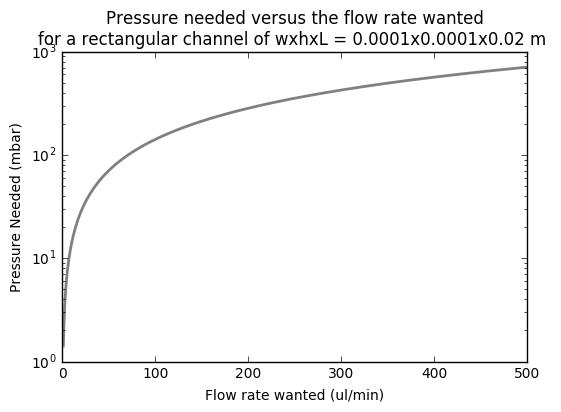

In [8]:
n = 1000

## Geometry
height = 100e-6  # m
width = 100e-6  # m
length = 20e-3  # m

## Water at 20°C
viscosity = 1.307e-3  # Pa.s or  N.s/m²
density = 1e3  # kg/m³

## Flow rate wanted
flow_rate = np.linspace(1, 500, n)  # ul/min

## Convert flow rate to IU
flow_rate_iu = (flow_rate / 60) * 1e-9

pressure_rectangle = calculate_pressure_rectangle(height, width, viscosity, length, flow_rate_iu)

fig, ax = plt.subplots()

ax.plot(flow_rate, pressure_rectangle / 100, label="Square Channel", lw=2, alpha=1.0, color="gray")

ax.set_xlabel("Flow rate wanted (ul/min)")
ax.set_ylabel("Pressure Needed (mbar)")

#ax.set_xscale("log")
ax.set_yscale("log")

ax.set_title("Pressure needed versus the flow rate wanted\nfor a rectangular channel of wxhxL = {}x{}x{} m ".format(height, width, length))

## Source

- https://en.wikipedia.org/wiki/Reynolds_number
- https://en.wikipedia.org/wiki/Pump
- https://en.wikipedia.org/wiki/Pressure-driven_flow
- http://www.dolomite-microfluidics.com/us/downloadsmain/microfluidic-calculator
- http://www.elveflow.com/microfluidic-tutorials/microfluidic-reviews-and-tutorials/flow-control-in-microfluidic-device/
- https://www.uio.no/studier/emner/matnat/math/MEK4450/h11/undervisningsmateriale/modul-5/Pipeflow_intro.pdf
- http://www.pipeflow.co.uk/public/articles/Non_Circular_Pipe_Friction.pdf
- http://pubs.rsc.org/en/content/chapterhtml/2014/bk9781849736718-00001?isbn=978-1-84973-671-8